In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("assets/Cars93.csv")
le = LabelEncoder()
df2 = df.apply(le.fit_transform)
df2.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,0,0,48,3,25,33,36,10,11,2,...,2,18,10,6,5,9,4,24,1,0
1,1,0,55,2,67,71,73,3,5,0,...,2,36,23,9,6,16,8,60,1,1
2,2,1,8,0,63,66,63,5,6,1,...,2,21,10,5,5,12,7,50,1,3
3,3,1,0,2,69,76,76,4,6,0,...,3,34,14,8,5,18,10,52,1,2
4,4,2,5,2,61,68,69,7,10,1,...,1,27,17,7,7,10,6,64,1,4


In [25]:
df2 = df2[["Price","MPG.highway"]]
from sklearn.cluster import AgglomerativeClustering
#ac = AgglomerativeClustering()
ac = AgglomerativeClustering(n_clusters=7)
model = ac.fit(df2)

In [26]:
model.labels_

array([4, 3, 0, 3, 0, 4, 0, 0, 0, 3, 3, 2, 2, 6, 4, 4, 4, 4, 3, 4, 4, 0,
       2, 2, 6, 1, 6, 0, 2, 1, 5, 2, 2, 4, 6, 1, 1, 0, 5, 2, 1, 2, 4, 5,
       2, 2, 6, 3, 0, 3, 3, 3, 5, 2, 4, 1, 3, 0, 3, 6, 6, 2, 0, 2, 4, 1,
       0, 6, 4, 1, 0, 6, 5, 2, 4, 4, 0, 0, 2, 5, 2, 1, 5, 2, 4, 4, 0, 2,
       1, 1, 0, 0, 0])

# Distance Matrix (Euclidean) -> Linkage -> Dendogram

/Users/prathameshmadur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


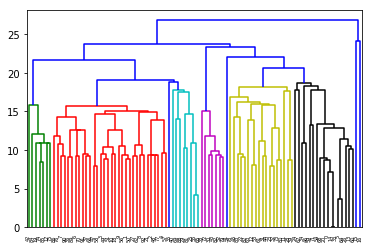

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
B = distance_matrix(df2.values,df2.values)
linkage_matrix = linkage(B)
dendrogram(linkage_matrix,orientation='top')
plt.show()

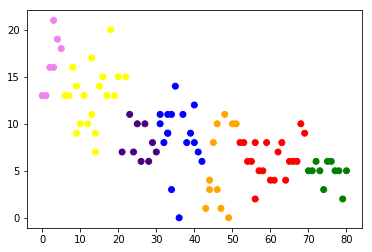

In [29]:
colors = {0: "red", 1: "orange", 2: "yellow", 3: "green", 4:"blue", 5: "violet", 6: "indigo"}
coloring = []
for vector in model.labels_:
    coloring.append(colors[vector])
    
plt.scatter(df2[["Price"]],df2[["MPG.highway"]], c=coloring)
